In [2]:
# Tratamiento y manipulación de datos
import pandas as pd
import numpy as np

# Acceso a datos financieros
import yfinance as yf
import requests
from io import StringIO

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes para gráficos
%matplotlib inline
sns.set(style='whitegrid', palette='deep', context='notebook')


In [3]:
# Descarga del tipo de cambio USD/EUR
usd_eur = yf.download('EURUSD=X', start='2010-01-01', end='2025-07-17')

# Seleccionamos sólo el precio de cierre diario
usd_eur = usd_eur[['Close']].rename(columns={'Close': 'USD/EUR'})
usd_eur.index.name = 'Fecha'

# Vista preliminar
usd_eur.head()


C:\Users\cpuertas\AppData\Local\Temp\ipykernel_10832\599427533.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_eur = yf.download('EURUSD=X', start='2010-01-01', end='2025-07-17')
[*********************100%***********************]  1 of 1 completed


Price,USD/EUR
Ticker,EURUSD=X
Fecha,
2010-01-01,1.438994
2010-01-04,1.442398
2010-01-05,1.436596
2010-01-06,1.440403
2010-01-07,1.431803


In [4]:
# Descarga del índice DXY (Dollar Index)
dxy = yf.download('DX-Y.NYB', start='2010-01-01', end='2025-07-17')

# Seleccionamos el cierre
dxy = dxy[['Close']].rename(columns={'Close': 'DXY'})
dxy.index.name = 'Fecha'

# Vista preliminar
dxy.head()


C:\Users\cpuertas\AppData\Local\Temp\ipykernel_10832\1211452938.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dxy = yf.download('DX-Y.NYB', start='2010-01-01', end='2025-07-17')
[*********************100%***********************]  1 of 1 completed


Price,DXY
Ticker,DX-Y.NYB
Fecha,
2010-01-04,77.529999
2010-01-05,77.620003
2010-01-06,77.489998
2010-01-07,77.910004
2010-01-08,77.470001


C:\Users\cpuertas\AppData\Local\Temp\ipykernel_10832\3715466187.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


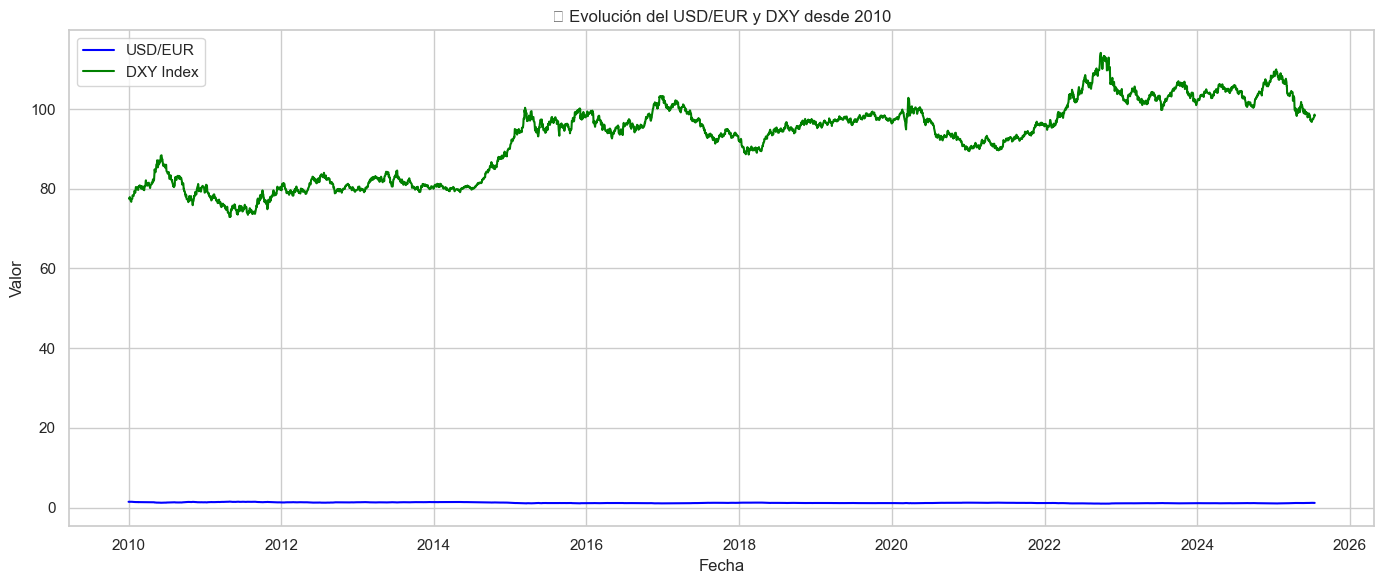

In [5]:
# Configuramos la figura
plt.figure(figsize=(14, 6))

# Primer eje: USD/EUR
plt.plot(usd_eur.index, usd_eur['USD/EUR'], label='USD/EUR', color='blue')

# Segundo eje: DXY
plt.plot(dxy.index, dxy['DXY'], label='DXY Index', color='green')

# Estética
plt.title('📈 Evolución del USD/EUR y DXY desde 2010')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# URL del CSV oficial de inflación (CPI)
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL'

# Descarga y lectura del archivo
response = requests.get(url)
inflacion = pd.read_csv(StringIO(response.text))

# Limpieza de columnas
inflacion.columns = inflacion.columns.str.strip()

# Conversión de fechas y renombrado
inflacion['observation_date'] = pd.to_datetime(inflacion['observation_date'])
inflacion = inflacion.set_index('observation_date').rename(columns={'CPIAUCSL': 'Inflación USA'})
inflacion.index.name = 'Fecha'

# Vista preliminar
inflacion.head()


,Inflación USA
Fecha,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [10]:
usd_eur.to_csv('USD_EUR.csv')
dxy.to_csv('DXY_Index.csv')
inflacion.to_csv('Inflacion_USA.csv')


In [11]:
url_fed = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS'
response_fed = requests.get(url_fed)
fed_rate = pd.read_csv(StringIO(response_fed.text))
fed_rate.columns = fed_rate.columns.str.strip()
fed_rate['observation_date'] = pd.to_datetime(fed_rate['observation_date'])
fed_rate = fed_rate.set_index('observation_date').rename(columns={'FEDFUNDS': 'Tasa Fed'})
fed_rate.index.name = 'Fecha'
fed_rate.head()


,Tasa Fed
Fecha,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


In [12]:
fed_rate.to_csv('Tasa_Interes_Fed.csv')
